In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [319]:
PATH = Path().parent
DDIR = PATH / 'dataset'

In [320]:
def missing(df):
    missing = df.isnull().sum()
    percent = round(100*(missing/df.shape[0]),2)
    types = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({"missing":missing,
                        "percent_missing":percent,
                        "types":types,
                        "n_unique":n_unique}).sort_values("percent_missing",ascending=False)

In [321]:
def make_onehot(df:pd.DataFrame,col):
    dummies = pd.get_dummies(df[col],prefix=col,prefix_sep='_')
    df = pd.concat([df,dummies],axis=1)
    df.drop(col,axis=1,inplace=True)
    return df

In [322]:
def make_countplot(df,col,target='Survived'):
    plt.figure(figsize=(20,10))
    sns.countplot(x=df[col],hue=df[target])
    plt.xticks(rotation=90)
    plt.show()

In [323]:
train = pd.read_csv(DDIR / 'train.csv')
test = pd.read_csv(DDIR / 'test.csv')

In [324]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [325]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [326]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


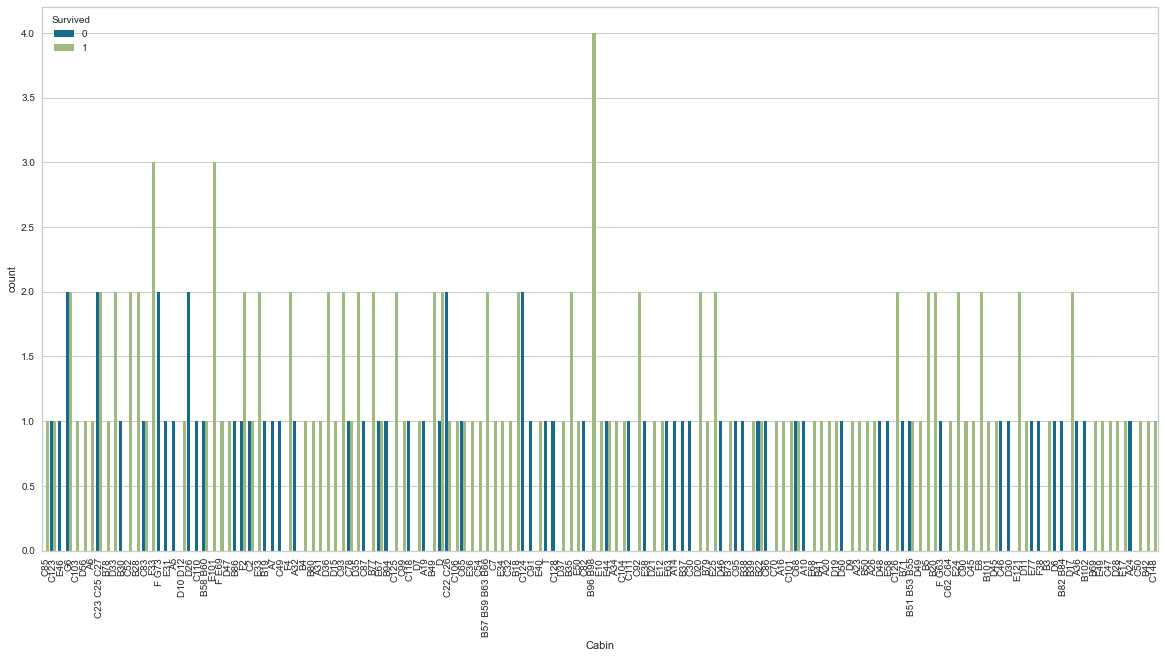

In [327]:
make_countplot(train,'Cabin')

We can say that the distribution of Survived and not Survived each cabin is roughly around 50% Which mean no matter which cabin the passenger is, they have 50% percentage of surviving.

In [328]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

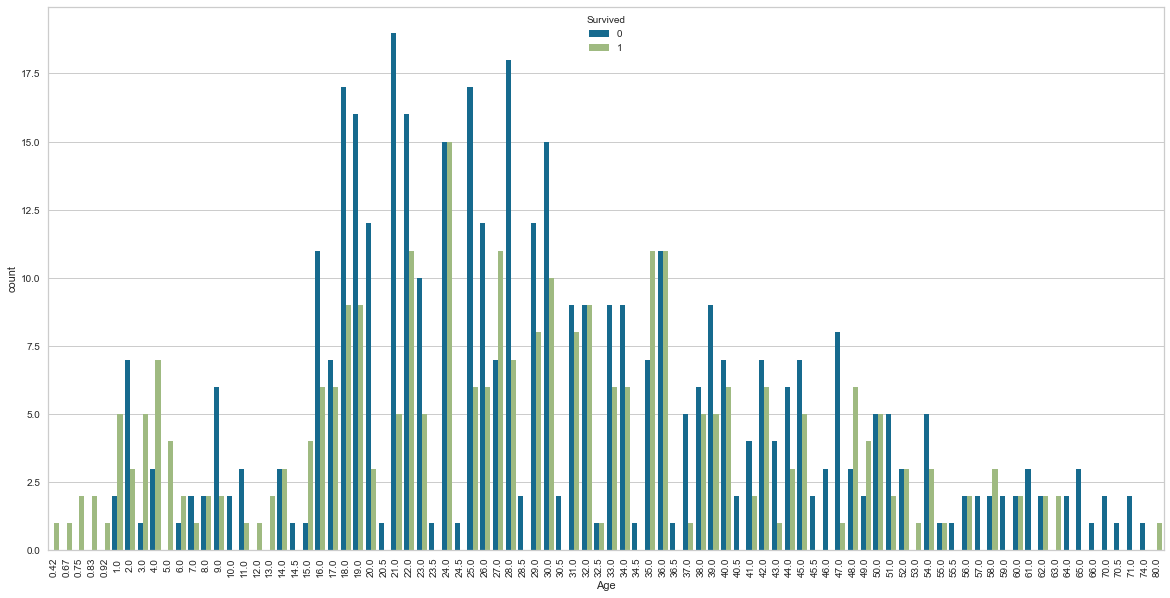

In [329]:
make_countplot(train,'Age')

In [330]:
train[train['Age']==0.42]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C


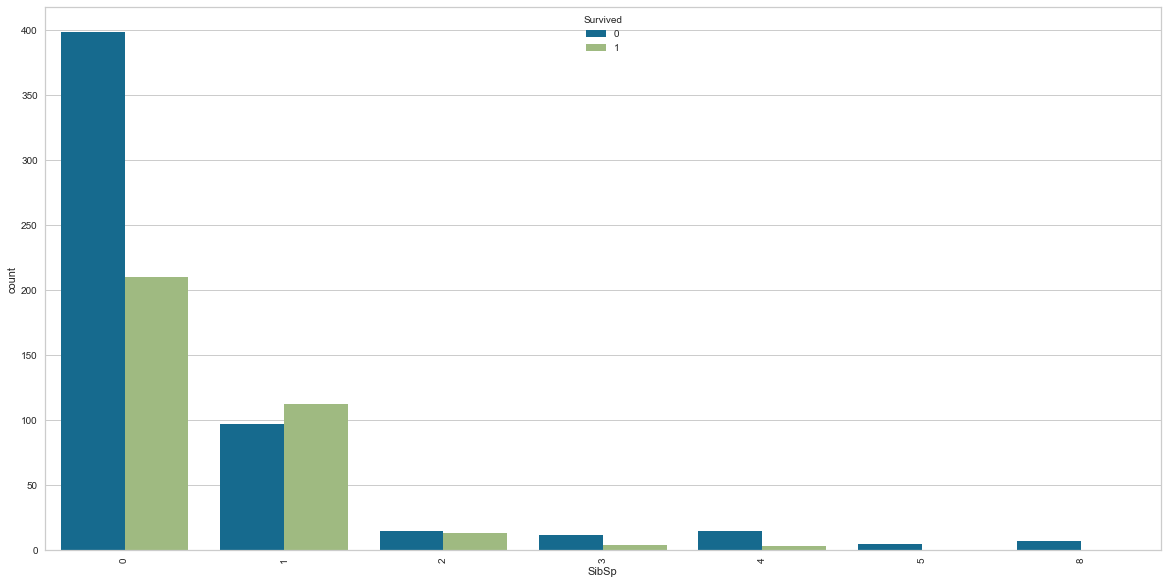

In [331]:
make_countplot(train, 'SibSp')

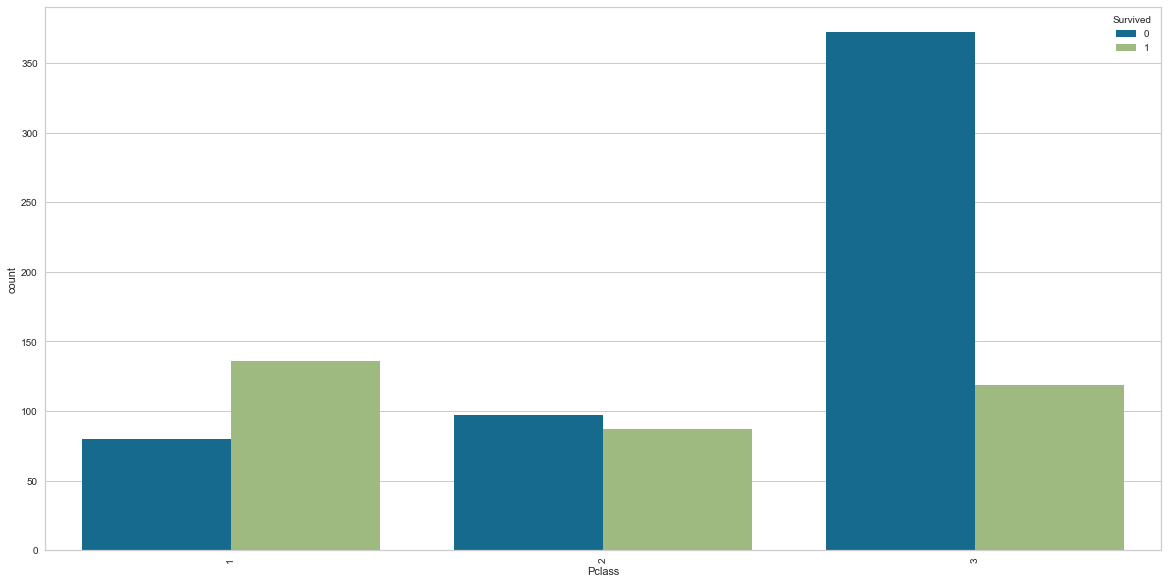

In [332]:
plt.figure(figsize=(20,10))
sns.countplot(x=train['Pclass'],hue=train['Survived'])
plt.xticks(rotation=90)
plt.show()

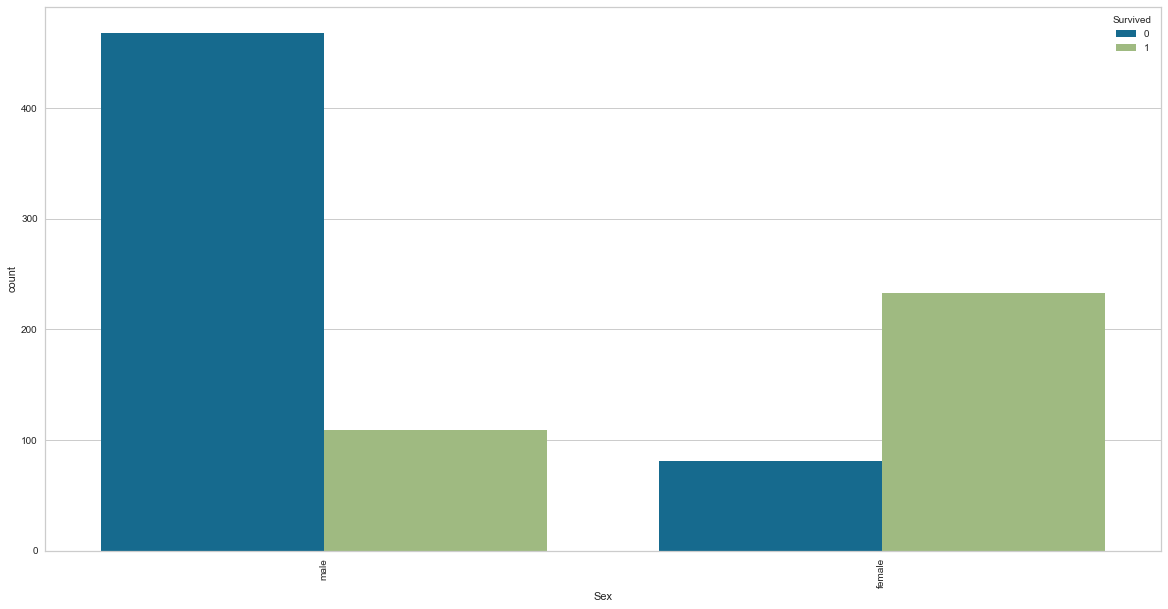

In [333]:
make_countplot(train,'Sex')

Seems like females has more percentage of being Survived than male. Maybe most of males protect their females so their female could survived?

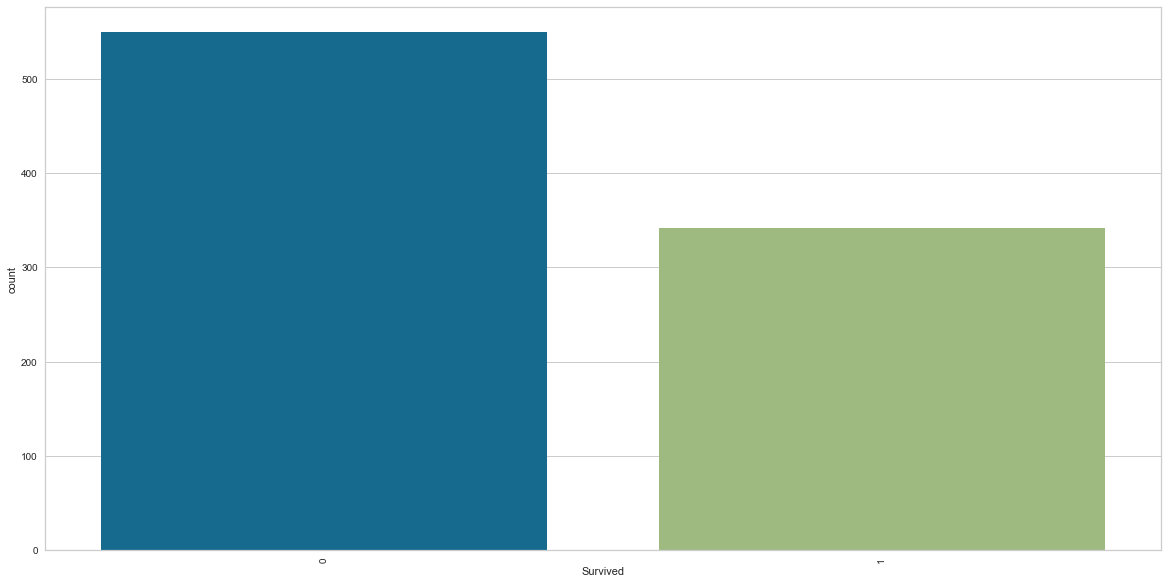

In [334]:
plt.figure(figsize=(20,10))
sns.countplot(x=train['Survived'])
plt.xticks(rotation=90)
plt.show()

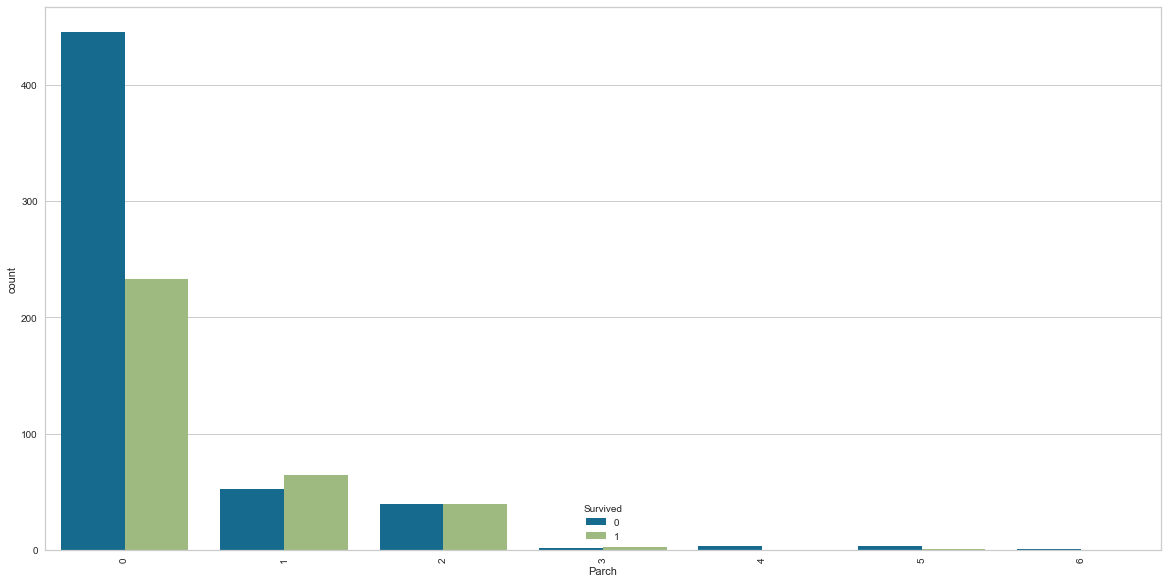

In [335]:
make_countplot(train,'Parch')

In [336]:
train[train['Ticket']=='349909']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,S
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,S


In [337]:
train.drop(['Name','PassengerId'],axis=1,inplace=True)
test.drop(['Name','PassengerId'],axis=1,inplace=True)

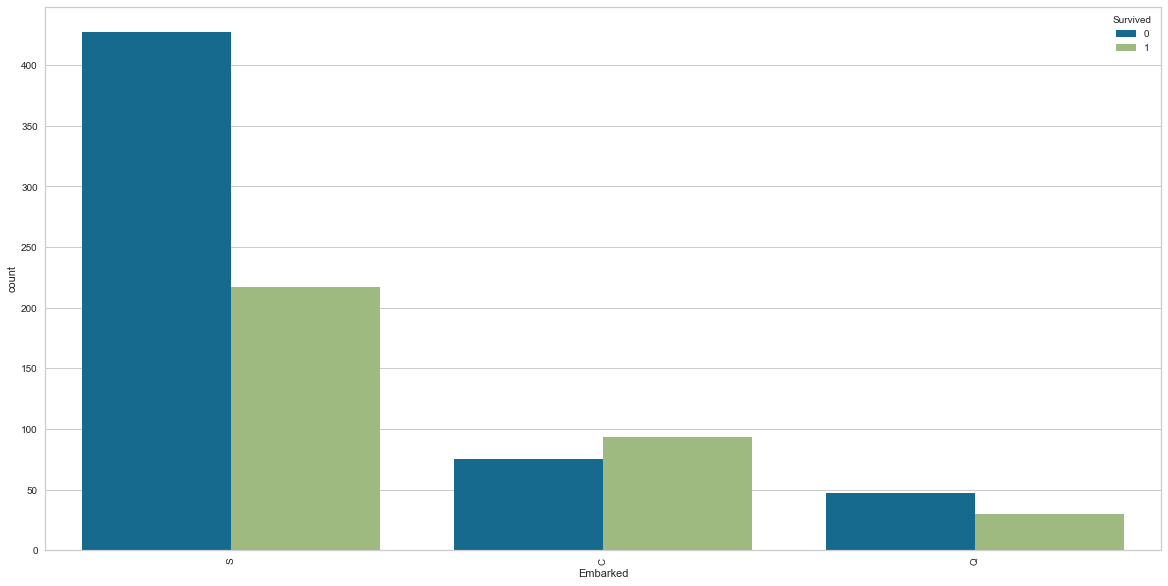

In [338]:
make_countplot(train,'Embarked')

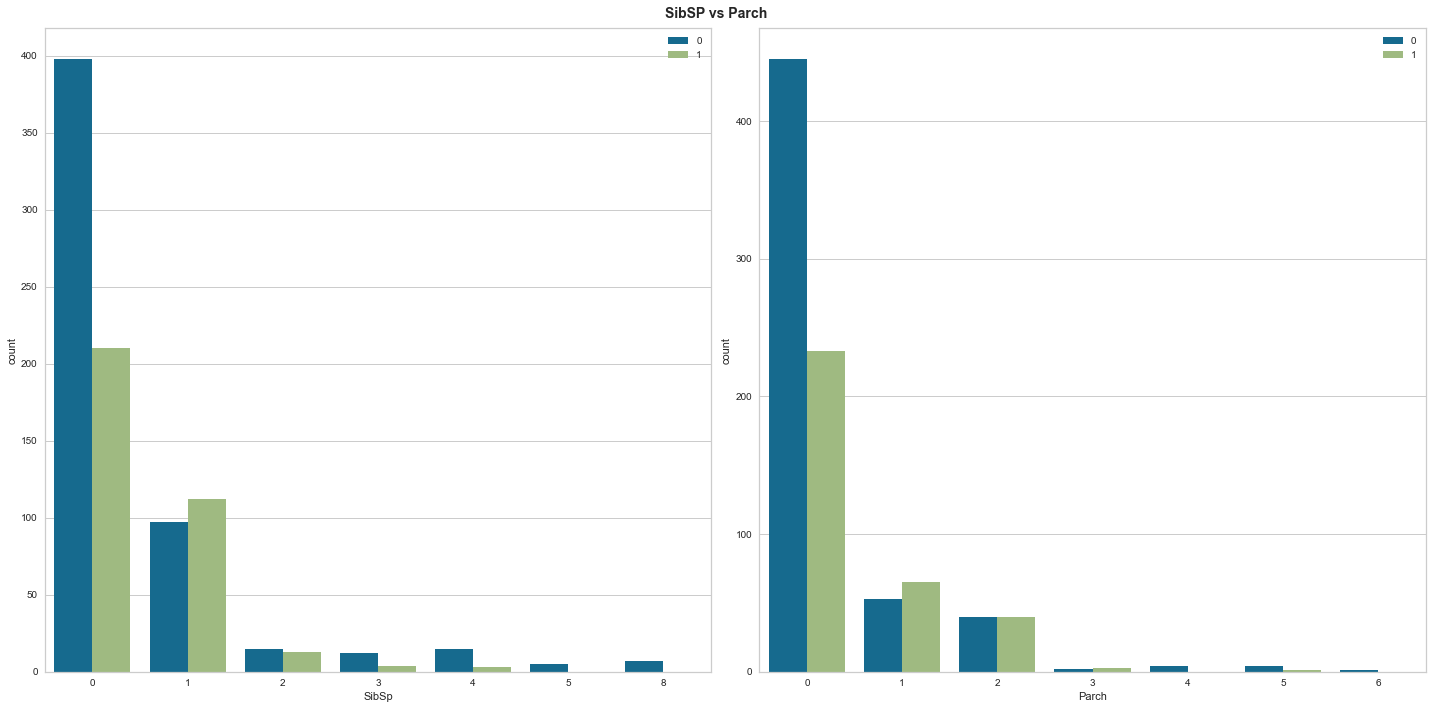

In [339]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
sns.countplot(x=train['SibSp'],hue=train['Survived'],ax=ax[0])
ax[0].legend(loc='upper right')
sns.countplot(x=train['Parch'],hue=train['Survived'],ax=ax[1])
ax[1].legend(loc='upper right')
fig.suptitle('SibSP vs Parch', weight='bold', fontsize=14)
fig.tight_layout()
plt.show()

In [340]:
train.drop(['Fare'],axis=1,inplace=True)
test.drop(['Fare'],axis=1,inplace=True)

In [341]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [342]:
train = train.dropna()

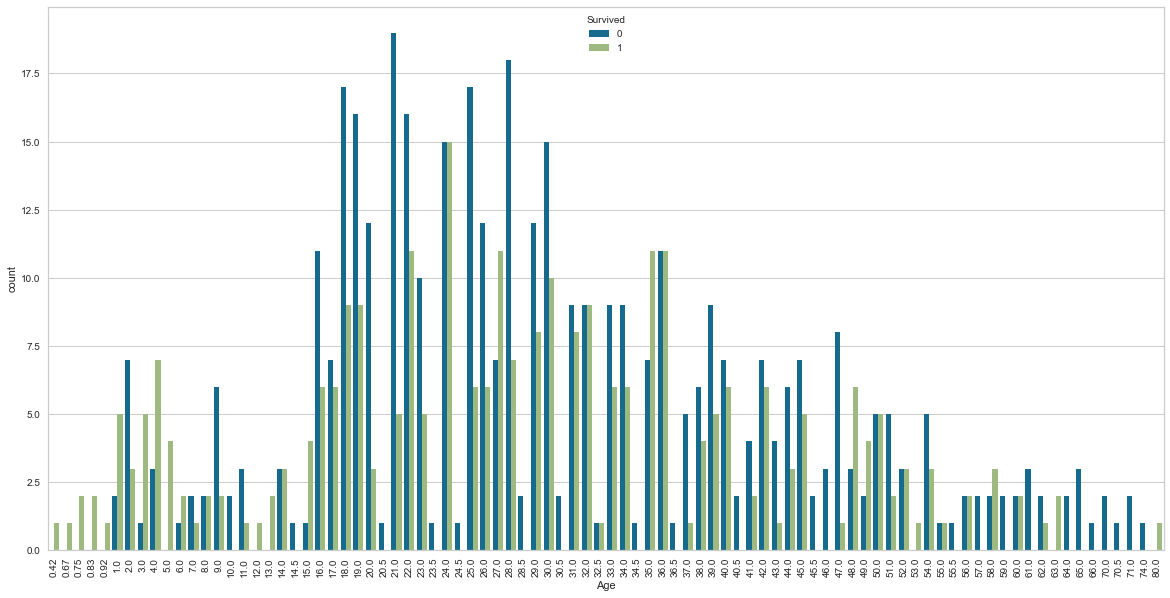

In [343]:
make_countplot(train,'Age')

In [344]:
train = make_onehot(train, 'Sex')
test = make_onehot(test, 'Sex')

In [345]:
train = make_onehot(train, 'Embarked')
test = make_onehot(test, 'Embarked')

In [346]:
train = make_onehot(train, 'Pclass')
test = make_onehot(test, 'Pclass')

In [347]:
train.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [348]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Age         712 non-null    float64
 2   SibSp       712 non-null    int64  
 3   Parch       712 non-null    int64  
 4   Sex_female  712 non-null    uint8  
 5   Sex_male    712 non-null    uint8  
 6   Embarked_C  712 non-null    uint8  
 7   Embarked_Q  712 non-null    uint8  
 8   Embarked_S  712 non-null    uint8  
 9   Pclass_1    712 non-null    uint8  
 10  Pclass_2    712 non-null    uint8  
 11  Pclass_3    712 non-null    uint8  
dtypes: float64(1), int64(3), uint8(8)
memory usage: 49.5 KB


In [349]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score

In [350]:
X_train, X_test, y_train, y_test = tts(train.drop('Survived',axis=1),train['Survived'],test_size=0.2,random_state=42)

In [351]:
rf = RFC(n_estimators=1000, max_depth=10)

In [352]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [353]:
predictions = rf.predict(X_test)

In [354]:
print(accuracy_score(y_test,predictions))

0.8041958041958042


In [355]:
from sklearn.linear_model import LogisticRegression as LR

In [356]:
lr = LR().fit(X_train,y_train)

c:\Users\pande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [357]:
lr_prediction = lr.predict(X_test)

In [358]:
print(accuracy_score(y_test,lr_prediction))

0.8111888111888111


In [359]:
train.head()

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,0,1,1,0,0
4,0,35.0,0,0,0,1,0,0,1,0,0,1


In [362]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [363]:
test_lr_prediction = lr.predict(test)

In [369]:
test_data_get_passengerid = pd.read_csv(DDIR / 'test.csv')
test_data_get_passengerid = pd.DataFrame(test_data_get_passengerid['PassengerId'])
test_data_get_passengerid['Survived'] = test_lr_prediction

In [368]:
test_data_get_passengerid.to_csv('submission-lr.csv',index=False)

In [ ]:
from pycaret.classification import *

In [ ]:
train_data = pd.read_csv(DDIR / 'train.csv')
test_data = pd.read_csv(DDIR / 'test.csv')

In [ ]:
train_data.drop(['Cabin'],inplace=True,axis=1)

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [ ]:
s = setup(train_data, target='Survived', fix_imbalance=True, categorical_features=['Sex','Embarked','Pclass','Ticket'], numeric_features=['Age'], ignore_features=['Name','PassengerId','Fare','SibSp','Parch'])

,Description,Value
0,Session id,2751
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(712, 11)"
4,Transformed data shape,"(808, 10)"
5,Transformed train set shape,"(594, 10)"
6,Transformed test set shape,"(214, 10)"
7,Ignore features,5
8,Ordinal features,1
9,Numeric features,1


In [ ]:
best = compare_models()
best

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:31:39
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=2751)

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
result = pull()
result

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8111,0.8645,0.8005,0.7505,0.7716,0.6109,0.6160,0.137
lightgbm,Light Gradient Boosting Machine,0.8073,0.8611,0.7505,0.7736,0.7578,0.5981,0.6027,0.267
catboost,CatBoost Classifier,0.8050,0.8721,0.7157,0.7922,0.7475,0.5895,0.5960,0.797
gbc,Gradient Boosting Classifier,0.8030,0.8653,0.7210,0.7839,0.7462,0.5859,0.5920,0.151
xgboost,Extreme Gradient Boosting,0.7971,0.8541,0.7257,0.7660,0.7418,0.5752,0.5795,0.128
rf,Random Forest Classifier,0.7932,0.8420,0.7552,0.7482,0.7450,0.5718,0.5789,0.237
dt,Decision Tree Classifier,0.7830,0.7939,0.7057,0.7491,0.7216,0.5448,0.5505,0.080
ridge,Ridge Classifier,0.7811,0.0000,0.7160,0.7363,0.7222,0.5420,0.5458,0.079
lr,Logistic Regression,0.7790,0.8521,0.7505,0.7151,0.7292,0.5428,0.5473,1.131
lda,Linear Discriminant Analysis,0.7790,0.8523,0.7160,0.7319,0.7200,0.5379,0.5417,0.092


In [ ]:
save_model(best, 'titanic-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\pande\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapp...
                                                                    verbose=0))),
                 ('balance',
                  TransformerWrapper(exclude

In [ ]:
test_predicted = predict_model(best, data=test_data)

In [ ]:
test_predicted = test_predicted[['PassengerId','prediction_label']]

In [ ]:
test_predicted.rename(columns={'prediction_label':'Survived'},inplace=True)

c:\Users\pande\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
test_predicted.to_csv('submission.csv',index=False)